Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_GLI/~/Q.TO1.5J.A.B.I.A.770
Returned 178 rows for International claims on all sectors (worldwide)


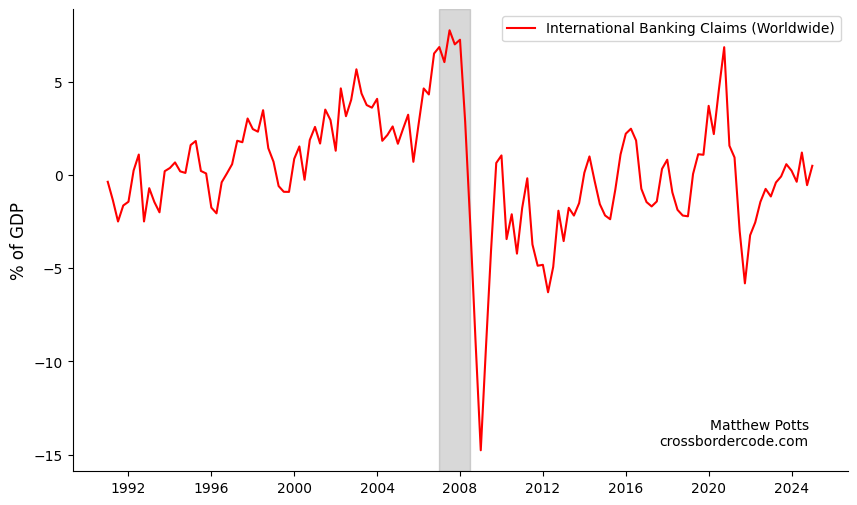

In [29]:
import getBISy.data as data
import getBISy.enums as enums
from pandas import DataFrame, PeriodIndex, to_numeric, Period

df = data.get_global_liquidity_data(
    freq='Q',
    currency='TO1',
    borrowing_country=enums.Region.LiquidityAllCountries,
    borrowing_sector=enums.Sector.LiquidityAllSectors,
    lending_sector=enums.Sector.Banks,
    position_type=enums.PositionType.CrossBorderAndLocal,
    instrument_type=enums.Instrument.All,
    unit_of_measure=enums.UnitOfMeasure.PercentageOfGDP
)

df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('1990-Q1', freq='Q').to_timestamp()
end = Period('2025-Q2', freq='Q').to_timestamp()
df = df[(df['Date'] >= start) & (df['Date'] <= end)]

df['Value'] = to_numeric(df['Value']).diff()
df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()


line_plot(df, title = None, unit = '% of GDP', key = 'International Banking Claims (Worldwide)', sig_loc = 'bottom right', include_gfc=True)

Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_GLI/~/Q.TO1.4Y.S.B.R.B.770
Returned 101 rows for Local bank claims on emerging Asia, Non-financial private sector
Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_GLI/~/Q.TO1.5C.S.B.R.B.770
Returned 101 rows for Local bank claims on Euro area, Non-financial private sector


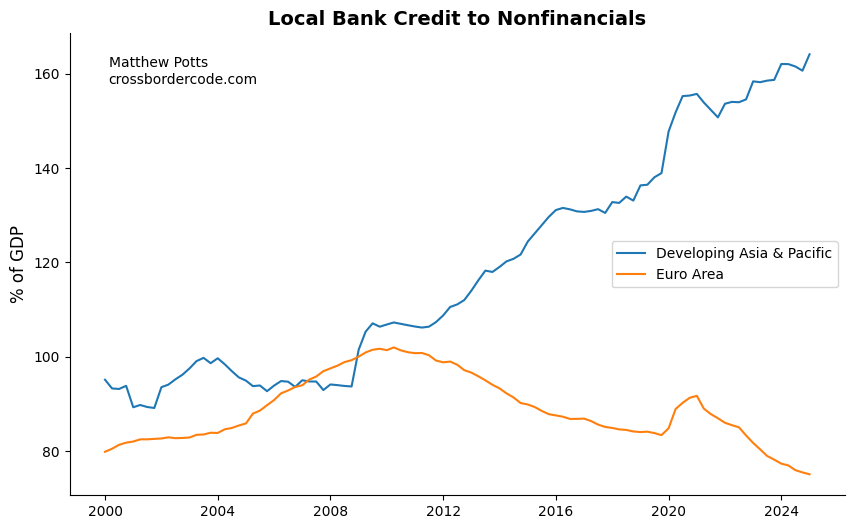

In [66]:
s1 = data.get_global_liquidity_data(freq='Q',
                               currency='TO1',
                               borrowing_country=enums.Region.DevelopingAsiaAndPacific,
                               borrowing_sector=enums.Sector.NonFinancialPrivateSector,
                               lending_sector=enums.Sector.Banks,
                               position_type= enums.PositionType.Local,
                               instrument_type=enums.Instrument.Credit,
                               unit_of_measure=enums.UnitOfMeasure.PercentageOfGDP
                               )
s2 = data.get_global_liquidity_data(freq='Q',
                               currency='TO1',
                               borrowing_country=enums.Region.EuroArea,
                               borrowing_sector=enums.Sector.NonFinancialPrivateSector,
                               lending_sector=enums.Sector.Banks,
                               position_type= enums.PositionType.Local,
                               instrument_type=enums.Instrument.Credit,
                               unit_of_measure=enums.UnitOfMeasure.PercentageOfGDP
                               )


s1['Date'] = pd.PeriodIndex(s1['Date'], freq='Q').to_timestamp()
# start = Period('1990-Q1', freq='Q').to_timestamp()
# end = Period('2025-Q2', freq='Q').to_timestamp()
# s1 = s1[(s1['Date'] >= start) & (s1['Date'] <= end)]
s1['Value'] = to_numeric(s1['Value'])
# s1['Trailing_4Q_Sum'] = s1['Value'].rolling(window=4).sum()


s2['Date'] = pd.PeriodIndex(s2['Date'], freq='Q').to_timestamp()
# start = Period('1990-Q1', freq='Q').to_timestamp()
# end = Period('2025-Q2', freq='Q').to_timestamp()
# s2 = s2[(s2['Date'] >= start) & (s2['Date'] <= end)]
s2['Value'] = to_numeric(s2['Value'])
# s2['Trailing_4Q_Sum'] = s2['Value'].rolling(window=4).sum()

multiline_plot_values([s1, s2], key = ['Developing Asia & Pacific', 'Euro Area'], title = 'Local Bank Credit to Nonfinancials', unit = '% of GDP', sig_loc = 'top left', include_gfc=False)


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_LBS_D_PUB/~/Q.S.C.G.USD.A.5J.A.5A.N.4Y.N
Returned 118 rows for WS_LBS_D_PUB/~/Q.S.C.G.USD.A.5J.A.5A.N.4Y.N
Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_LBS_D_PUB/~/Q.S.C.G.USD.A.5J.A.5A.N.5K.N
Returned 118 rows for WS_LBS_D_PUB/~/Q.S.C.G.USD.A.5J.A.5A.N.5K.N


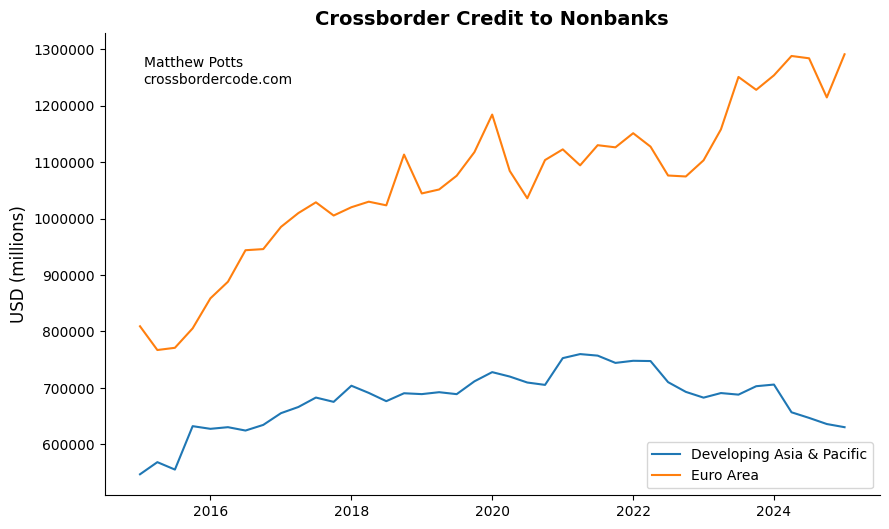

In [ ]:
s1 = data.get_locational_banking_data('Q',
                                        enums.LbsMeasure.Stocks,
                                        enums.Position.Claims,
                                        enums.Instrument.LoansAndDeposits,
                                        'USD',
                                        enums.CurrencyType.All,
                                        '5J',
                                        enums.Institution.All,
                                        '5A',
                                        enums.Sector.NonBanks,
                                        enums.Region.DevelopingAsiaAndPacific,
                                        enums.PositionType.CrossBorder)
s2 = data.get_locational_banking_data('Q',
                                        enums.LbsMeasure.Stocks,
                                        enums.Position.Claims,
                                        enums.Instrument.LoansAndDeposits,
                                        'USD',
                                        enums.CurrencyType.All,
                                        '5J',
                                        enums.Institution.All,
                                        '5A',
                                        enums.Sector.NonBanks,
                                        enums.Region.EuropeanDevelopedCountries,
                                        enums.PositionType.CrossBorder)


s1['Date'] = pd.PeriodIndex(s1['Date'], freq='Q').to_timestamp()
start = Period('2015-Q1', freq='Q').to_timestamp()
end = Period('2025-Q2', freq='Q').to_timestamp()
s1 = s1[(s1['Date'] >= start) & (s1['Date'] <= end)]
s1['Value'] = to_numeric(s1['Value'])

s2['Date'] = pd.PeriodIndex(s2['Date'], freq='Q').to_timestamp()
s2 = s2[(s2['Date'] >= start) & (s2['Date'] <= end)]
s2['Value'] = to_numeric(s2['Value'])

multiline_plot_values([s1, s2], key = ['Developing Asia & Pacific', 'Euro Area'], title = 'Crossborder Credit to Nonbanks', unit = 'USD (millions)', sig_loc = 'top left', include_gfc=False)


In [73]:
from matplotlib.ticker import ScalarFormatter
def multiline_plot_values(
        df: list[pd.DataFrame], 
        key: list[str], 
        title: str = None, 
        unit: str = 'USD (millions)',
        sig_loc: str = None,
        include_gfc: bool = False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))

    for df, key in zip(df, key):
        ax.plot(df['Date'], df['Value'], label=key)

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')

    if include_gfc:
        add_gfc(ax)

    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    ax.set_ylabel(unit, fontsize=12)

    if sig_loc is not None:
        add_signature(sig_loc, ax)

    ax.legend()

    plt.show()

def add_signature(loc: str, ax: plt.Axes) -> None:
    
    if loc == 'bottom right':
        ax.text(0.95, 0.05, _SIGNATURE,
            fontsize=10, color='black',
            ha='right', va='bottom', transform=ax.transAxes)
    elif loc == 'top left':
        ax.text(0.05, 0.95, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    elif loc == 'top right':
        ax.text(0.95, 0.95, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    elif loc == 'bottom left':
        ax.text(0.05, 0.05, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    else:
        raise ValueError("Invalid signature location specified.\nOptions are:\n 'bottom right'\n 'top left'")
    return

Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_GLI/~/Q.USD.3P.N.A.I.D.USD
Returned 101 rows for USD denominated international debt securities issued by non-bank borrowers located outside the US
Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_GLI/~/Q.USD.4T.N.A.I.D.USD
Returned 101 rows for USD denominated international debt securities issued by non-bank borrowers located in EMEs


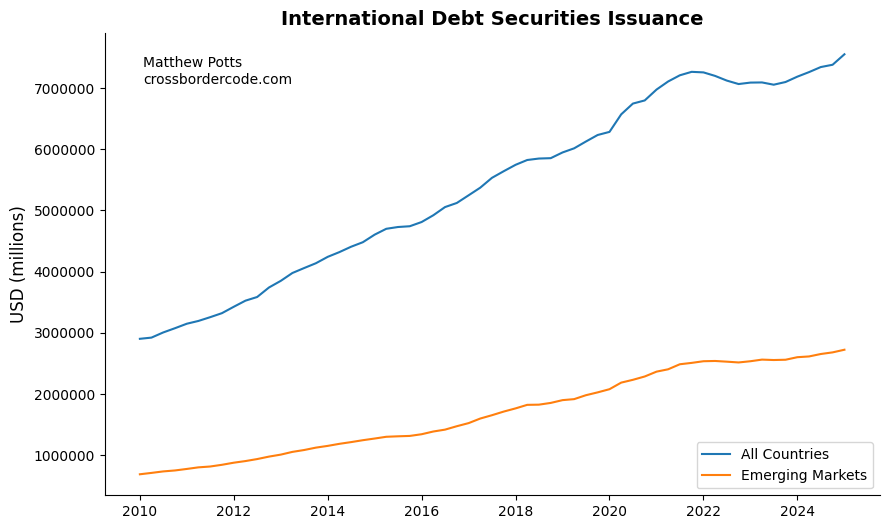

In [77]:
s1 = data.get_global_liquidity_data(
    freq='Q',
    currency='USD',
    borrowing_country=enums.Region.AllCountries,
    borrowing_sector=enums.Sector.NonBanks,
    lending_sector=enums.Sector.LiquidityAllSectors,
    position_type=enums.PositionType.CrossBorderAndLocal,
    instrument_type=enums.Instrument.Debt,
    unit_of_measure=enums.UnitOfMeasure.USD
)

s2 = data.get_global_liquidity_data(
    freq='Q',
    currency='USD',
    borrowing_country=enums.Region.EmergingAndDevelopingEconomies,
    borrowing_sector=enums.Sector.NonBanks,
    lending_sector=enums.Sector.LiquidityAllSectors,
    position_type=enums.PositionType.CrossBorderAndLocal,
    instrument_type=enums.Instrument.Debt,
    unit_of_measure=enums.UnitOfMeasure.USD
)

s1['Date'] = pd.PeriodIndex(s1['Date'], freq='Q').to_timestamp()
start = Period('2010-Q1', freq='Q').to_timestamp()
end = Period('2025-Q2', freq='Q').to_timestamp()
s1 = s1[(s1['Date'] >= start) & (s1['Date'] <= end)]
s1['Value'] = to_numeric(s1['Value'])

s2['Date'] = pd.PeriodIndex(s2['Date'], freq='Q').to_timestamp()
s2 = s2[(s2['Date'] >= start) & (s2['Date'] <= end)]
s2['Value'] = to_numeric(s2['Value'])

multiline_plot_values([s1, s2], key = ['All Countries', 'Emerging Markets'], title = 'International Debt Securities Issuance', unit = 'USD (millions)', sig_loc = 'top left', include_gfc=False)


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

_SIGNATURE = 'Matthew Potts\ncrossbordercode.com'

def line_plot(
        df: pd.DataFrame, 
        title: str = None, 
        unit : str = 'USD (millions)', 
        key: str = 'Title',
        sig_loc: str = None,
        include_gfc: bool = False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Date'], df['Trailing_4Q_Sum'], color='red', label=key)

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if include_gfc:
        add_gfc(ax)        
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    ax.set_ylabel(unit, fontsize=12)

    if sig_loc is not None:
        add_signature(sig_loc, ax)

    ax.legend()
    plt.show()

def multiline_plot(
        df: list[pd.DataFrame], 
        key: list[str], 
        title: str = None, 
        unit: str = 'USD (millions)',
        sig_loc: str = None,
        include_gfc: bool = False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))

    for df, key in zip(df, key):
        ax.plot(df['Date'], df['Trailing_4Q_Sum'], label=key)

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if include_gfc:
        add_gfc(ax)

    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    ax.set_ylabel(unit, fontsize=12)

    if sig_loc is not None:
        add_signature(sig_loc, ax)

    ax.legend()

    plt.show()

def add_signature(loc: str, ax: plt.Axes) -> None:
    
    if loc == 'bottom right':
        ax.text(0.95, 0.05, _SIGNATURE,
            fontsize=10, color='black',
            ha='right', va='bottom', transform=ax.transAxes)
    elif loc == 'top left':
        ax.text(0.05, 0.95, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    elif loc == 'top right':
        ax.text(0.95, 0.95, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    elif loc == 'bottom left':
        ax.text(0.05, 0.05, _SIGNATURE,
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    else:
        raise ValueError("Invalid signature location specified.\nOptions are:\n 'bottom right'\n 'top left'")
    return 


def add_gfc(ax: plt.Axes):
    start_period = pd.Timestamp('2007-01-01')
    end_period = pd.Timestamp('2008-06-30')
    ax.add_patch(Rectangle((start_period, ax.get_ylim()[0]),
                            end_period - start_period,
                            ax.get_ylim()[1] - ax.get_ylim()[0],
                            color='grey', alpha=0.3))